## Map the Census Tracts with the Most Arrests for Illegal Vending
for this week I wanted to undestand the census tracts with the highest arrest counts and begin to uncover trends among those high arrest tracts. I created four sets of maps in four seperate notebooks. I used the same process for each but filtered the arrest types I was mapping for all of them. To avoid redundancy I have not added markdowns to each notebook. For detailed markdowns, view the public space notebook. 

In [1]:
# to read and wrangle data
import pandas as pd

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('week10.csv',
                  dtype=
        {'FIPS':str,
        }
               )

In [3]:
tracts = pd.read_csv('Census_Tracts_2010.csv',
                      dtype= {'GEOID10':str,
        }
               )

In [4]:
tracts['FIPS'] = tracts['GEOID10']

In [5]:
df2=df.merge(tracts,on="FIPS")
del df2['Unnamed: 0']

In [6]:
df3 = df2.query('vending_count > 130')

In [7]:
latlong = pd.read_csv('arrests_with_neighborhood_info.csv',
                      dtype= {'geoid':str,
        }
                     )

In [8]:
fips = df3['FIPS'].tolist()

In [9]:
latlon_filtered = latlong.loc[latlong['geoid'].isin(fips)]

In [10]:
vending = ['41.27CLAMC',
'42.15G29LAM',
'42.14.1LAMC',
'42.45LAMC',
'4219(A)LAMC',
'42150000000',
'42.15(I)3LA',
'42.15(E)5LA',
'42.30 BP',
'42.0(B)LAMC',
'4218ALAMC',
'42.00BLAMC',
'42.00LAMC',
'42.00HLAMC',
'63.44',
'63.44B(16)L',
'63.44(B)3PC',
'63.44D24LAM',
'6344B26BLAM',
'63.44(A)(14',
'6344.44I9LA',
'63.44(B)4BL',
'63.4401LAMC',
'63.44.B.14C',
'42',
'42.00 B LAMC',
'42.00 LAMC',
'42.00.1(B)',
'42.00.1(D)LA',
'42.00.1B',
'42.00.1CLAMC',
'42.00.1DLAMC',
'42.00.1LAMC',
'42.00(A)(1)L',
'42.00(A)LAMC',
'42.00(B)',
'42.00(B)BLAM',
'42.00(B)LAMC',
'42.00(B)LAMN',
'42.00(C)(1)',
'42.00(C)(1)L',
'42.00(C)1',
'42.00(C)LAMC',
'42.00(D)LAMC',
'42.00(H)LAMC',
'42.00(O)LAMC',
'42.009B)LAMC',
'42.00ALAMC',
'42.00B',
'42.00B LAMC',
'42.00BLAMC',
'42.00C1LAMC',
'42.00CLAMC',
'42.00DLAMC',
'42.00GLAMC',
'42.00HLAMC',
'42.00LAMC',
'63.44',
'63.44 (B)',
'63.44 19LAMC',
'63.44 24B',
'63.44 B 14 A',
'63.44 B 14 B',
'63.44 B 24',
'63.44 B(14)A',
'63.44 B14(A)',
'63.44 B24LAM',
'63.44 B26(D)',
'63.44 B7LAM',
'63.44 I 9 LA',
'63.44 I9LAMC',
'63.44 LAMC',
'63.44.(B)(26',
'63.44.04LAMC',
'63.44.13.24',
'63.44.14(B)(',
'63.44.14B1LA',
'63.44.14CLAM',
'63.44.18LAMC',
'63.44.23.DR',
'63.44.23(D)4',
'63.44.23LAMC',
'63.44.24LAMC',
'63.44.26O',
'63.44.6.24LA',
'63.44.B 2 C',
'63.44.B.14',
'63.44.B.14A',
'63.44.B.14CL',
'63.44.B.14LA',
'63.44.B.20LA',
'63.44.B.24',
'63.44.B.24LA',
'63.44.B(14)',
'63.44.B14',
'63.44.B14(A)',
'63.44.B14A',
'63.44.B14CLA',
'63.44.B14LAM',
'63.44.B17LAM',
'63.44.B24',
'63.44.B24LAM',
'63.44.D.4.LA',
'63.44.D.4LAM',
'63.44.D14LAM',
'63.44.D3LAMC',
'63.44.D4LAMC',
'63.44.I.9',
'63.44.I.9LAM',
'63.44.LAMC',
'63.44((J)3LA',
'63.44()B)14B',
'63.44()B)19L',
'63.44()B)24L',
'63.44(0)1LAM',
'63.44(1)(12)',
'63.44(1)(9)',
'63.44(1)(A)L',
'63.44(1)12MC',
'63.44(1)9LAM',
'63.44(1)LAMC',
'63.44(12)LAM',
'63.44(23)D4L',
'63.44(24)LAM',
'63.44(26)(B)',
'63.44(26)D',
'63.44(6)24LA',
'63.44(9)ILAM',
'63.44(A)(1)',
'63.44(A)(4)L',
'63.44(A)14AL',
'63.44(A)14BL',
'63.44(A)1LAM',
'63.44(A)24LA',
'63.44(A)26LA',
'63.44(A)LAMC',
'63.44(B )14B',
'63.44(B-14)',
'63.44(B-14)C',
'63.44(B)',
'63.44(B) (24',
'63.44(B) 14A',
'63.44(B) 14C',
'63.44(B)(1)',
'63.44(B)(1)4',
'63.44(B)(14)',
'63.44(B)(14B',
'63.44(B)(17)',
'63.44(B)(2)',
'63.44(B)(2)(',
'63.44(B)(2)6',
'63.44(B)(2)D',
'63.44(B)(2)L',
'63.44(B)(20)',
'63.44(B)(24)',
'63.44(B)(240',
'63.44(B)(26)',
'63.44(B)(3)L',
'63.44(B)(4)',
'63.44(B)(4)L',
'63.44(B)(7)',
'63.44(B)(7)L',
'63.44(B)(C)',
'63.44(B)(Z4)',
'63.44(B)1.4A',
'63.44(B)1(4)',
'63.44(B)10LA',
'63.44(B)12BL',
'63.44(B)12LA',
'63.44(B)13',
'63.44(B)13LA',
'63.44(B)14',
'63.44(B)14 9',
'63.44(B)14 A',
'63.44(B)14 C',
'63.44(B)14(4',
'63.44(B)14(A',
'63.44(B)14(B',
'63.44(B)14(C',
'63.44(B)146',
'63.44(B)146L',
'63.44(B)147B',
'63.44(B)149L',
'63.44(B)14A',
'63.44(B)14AK',
'63.44(B)14AL',
'63.44(B)14B',
'63.44(B)14BK',
'63.44(B)14BL',
'63.44(B)14BO',
'63.44(B)14C',
'63.44(B)14CL',
'63.44(B)14DL',
'63.44(B)14EL',
'63.44(B)14FL',
'63.44(B)14GL',
'63.44(B)14LA',
'63.44(B)14PC',
'63.44(B)14PL',
'63.44(B)14SL',
'63.44(B)14XL',
'63.44(B)16LA',
'63.44(B)17',
'63.44(B)17AL',
'63.44(B)17LA',
'63.44(B)18LA',
'63.44(B)19',
'63.44(B)19BL',
'63.44(B)19LA',
'63.44(B)1B4L',
'63.44(B)1BLA',
'63.44(B)20',
'63.44(B)20LA',
'63.44(B)21LA',
'63.44(B)23D4',
'63.44(B)24',
'63.44(B)24;A',
'63.44(B)242',
'63.44(B)24AL',
'63.44(B)24AM',
'63.44(B)24BL',
'63.44(B)24L',
'63.44(B)24LA',
'63.44(B)24LM',
'63.44(B)24LS',
'63.44(B)26',
'63.44(B)26(C',
'63.44(B)26(D',
'63.44(B)26C',
'63.44(B)26CL',
'63.44(B)26D',
'63.44(B)26DL',
'63.44(B)26F1',
'63.44(B)26LA',
'63.44(B)2BLA',
'63.44(B)2CLA',
'63.44(B)2D',
'63.44(B)2DLA',
'63.44(B)2DLM',
'63.44(B)2LAM',
'63.44(B)2OLA',
'63.44(B)3PC',
'63.44(B)44',
'63.44(B)44BL',
'63.44(B)44LA',
'63.44(B)4ALA',
'63.44(B)4BLA',
'63.44(B)4LAM',
'63.44(B)8LAM',
'63.44(B)ALAM',
'63.44(B)B14L',
'63.44(B)B26D',
'63.44(B)D14L',
'63.44(B)D4LA',
'63.44(B)H(A)',
'63.44(B)I9LA',
'63.44(B)LA',
'63.44(B)LAMC',
'63.44(B)PC',
'63.44(B014BL',
'63.44(B024LA',
'63.44(B0LAMC',
'63.44(B14)C',
'63.44(BA)24L',
'63.44(BO14BL',
'63.44(BO24LA',
'63.44(C)14(C',
'63.44(C)LAMC',
'63.44(C0LAMC',
'63.44(D)',
'63.44(D)(1)L',
'63.44(D)(14)',
'63.44(D)(24)',
'63.44(D)(4)',
'63.44(D)(4)L',
'63.44(D)(4)M',
'63.44(D)11LA',
'63.44(D)14AL',
'63.44(D)14BL',
'63.44(D)14LA',
'63.44(D)24LA',
'63.44(D)4',
'63.44(D)44',
'63.44(D)4LAM',
'63.44(D)4LAN',
'63.44(D)ALAM',
'63.44(D)LAMC',
'63.44(D)R',
'63.44(E)9LAM',
'63.44(F)LAMC',
'63.44(H)LAMC',
'63.44(I)(12)',
'63.44(I)(9)',
'63.44(I)(9)L',
'63.44(I)(A)',
'63.44(I)(A)L',
'63.44(I)0LAM',
'63.44(I)12',
'63.44(I)12LA',
'63.44(I)13C',
'63.44(I)13CL',
'63.44(I)13DL',
'63.44(I)13LA',
'63.44(I)19LA',
'63.44(I)3LAM',
'63.44(I)4LAM',
'63.44(I)9',
'63.44(I)9BLA',
'63.44(I)9KAN',
'63.44(I)9LAI',
'63.44(I)9LAM',
'63.44(I)9LAN',
'63.44(I)ALAM',
'63.44(I)LAMC',
'63.44(I)PLAM',
'63.44(J)12LA',
'63.44(J)3LAM',
'63.44(K)(2)',
'63.44(K)(2)L',
'63.44(K2)LAM',
'63.44(L)12',
'63.44(L)12LA',
'63.44(M)(2)L',
'63.44(N)(3)',
'63.44(N)1LAM',
'63.44(N)3LAM',
'63.44(N)ILAM',
'63.44(O)ILAM',
'63.44(O)LAMC',
'63.44(S)(4)L',
'63.44(V)24LA',
'63.44)(B)24L',
'63.44)B24LA',
'63.440-4LAMC',
'63.440.4LAMC',
'63.4401LAMC',
'63.4404LAMC',
'63.440ILAMC',
'63.441(9)',
'63.441(B)13L',
'63.44112LAMC',
'63.4411ZLAMC',
'63.4412LAMC',
'63.4413LAMC',
'63.4414ALAMC',
'63.4414ALMAC',
'63.4414B14',
'63.4414BLAMC',
'63.4414LAMC',
'63.4419LAMC',
'63.441ALAMC',
'63.441BLAMC',
'63.4424LAMC',
'63.4426(D)',
'63.4426C',
'63.442DLAMC',
'63.442LAMC',
'63.444B3LAMC',
'63.444LAMC',
'63.44526DLAM',
'63.445B26CLA',
'63.44614ALAM',
'63.44614LMC',
'63.447(B)2DL',
'63.448BLAMC',
'63.449(B)24L',
'63.449B)(7)',
'63.449B)24LA',
'63.449B)LAMC',
'63.449B0(240',
'63.449I)(9)',
'63.44A14LAMC',
'63.44A24LAMC',
'63.44A3LAMC',
'63.44ABLAMC',
'63.44AIILAMC',
'63.44ALAMC',
'63.44ALAMD',
'63.44B',
'63.44B 14(A)',
'63.44B 14(C)',
'63.44B 149 L',
'63.44B 14A',
'63.44B 7LAMC',
'63.44B LAMC',
'63.44B.04CLA',
'63.44B.14',
'63.44B.14(A)',
'63.44B.14(C)',
'63.44B.14ALA',
'63.44B.14C',
'63.44B.14CLA',
'63.44B.14LAM',
'63.44B.24LAM',
'63.44B(1)4LA',
'63.44B(14)AL',
'63.44B(14)B',
'63.44B(14)BL',
'63.44B(14)C',
'63.44B(14)LA',
'63.44B(14B)',
'63.44B(16)LA',
'63.44B(20)HS',
'63.44B(24)',
'63.44B(24)LA',
'63.44B(26)D',
'63.44B(A)LAM',
'63.44B(B)24L',
'63.44B1(4)AL',
'63.44B10LAMC',
'63.44B114A',
'63.44B11LAMC',
'63.44B124',
'63.44B12LAMC',
'63.44B13(A)',
'63.44B13LAMC',
'63.44B14',
'63.44B14(A)',
'63.44B14(A)L',
'63.44B14(B)',
'63.44B14(B)L',
'63.44B14(C)',
'63.44B14(C)L',
'63.44B14(F)',
'63.44B141LAM',
'63.44B146',
'63.44B146LAM',
'63.44B14A',
'63.44B14AAMC',
'63.44B14ALAC',
'63.44B14ALAM',
'63.44B14ALAN',
'63.44B14ALMA',
'63.44B14ALMC',
'63.44B14B',
'63.44B14BALA',
'63.44B14BLAM',
'63.44B14BP',
'63.44B14C',
'63.44B14CALA',
'63.44B14CLAM',
'63.44B14CMC',
'63.44B14D',
'63.44B14DLAM',
'63.44B14LAM',
'63.44B14LAMC',
'63.44B14LAMD',
'63.44B14LLAM',
'63.44B14PC',
'63.44B14RLAM',
'63.44B16LAMC',
'63.44B17',
'63.44B17LAMC',
'63.44B18LAMC',
'63.44B19',
'63.44B19LAM',
'63.44B19LAMC',
'63.44B1ALAMC',
'63.44B1LAMC',
'63.44B2',
'63.44B2(D)',
'63.44B2(D)LA',
'63.44B20LAMC',
'63.44B21LAMC',
'63.44B22',
'63.44B22LAMC',
'63.44B23LAMC',
'63.44B24',
'63.44B24 LAM',
'63.44B24A',
'63.44B24ALAM',
'63.44B24B',
'63.44B24CLAM',
'63.44B24LAM',
'63.44B24LAMC',
'63.44B24LANC',
'63.44B24PC',
'63.44B25LAMC',
'63.44B26(B)',
'63.44B26(C)',
'63.44B26(C)L',
'63.44B26(D)',
'63.44B26(D)L',
'63.44B26(D)M',
'63.44B260LAM',
'63.44B26ALAM',
'63.44B26BLAM',
'63.44B26C',
'63.44B26CLAM',
'63.44B26D',
'63.44B26DLAM',
'63.44B26F1LA',
'63.44B26LAM',
'63.44B26LAMC',
'63.44B26SLAM',
'63.44B27LAMC',
'63.44B29LAMC',
'63.44B2ALAMC',
'63.44B2D',
'63.44B2DLAMC',
'63.44B2HLAMC',
'63.44B2LAMC',
'63.44B2LAMCM',
'63.44B3',
'63.44B35LAMC',
'63.44B3LAMC',
'63.44B44LAMC',
'63.44B4ALAMC',
'63.44B4BLAMC',
'63.44B4CLAMC',
'63.44B4LAMC',
'63.44B54LAMC',
'63.44B74CLAM',
'63.44B74LAMC',
'63.44B7LAMC',
'63.44B8LAMC',
'63.44B9LAMC',
'63.44BA14LAM',
'63.44BALAMC',
'63.44BBLAMC',
'63.44BC(D)LA',
'63.44BC4',
'63.44BCLAMC',
'63.44BD4LAMC',
'63.44BH',
'63.44BHALAMC',
'63.44BLAMC',
'63.44BMBLAMC',
'63.44BPC',
'63.44BPCLAMC',
'63.44BS4LAMC',
'63.44BS6DLAM',
'63.44CLAMC',
'63.44D 4LAMC',
'63.44D LAMC',
'63.44D-4LAMC',
'63.44D.4LAMC',
'63.44D(4)',
'63.44D(4)LAM',
'63.44D1',
'63.44D14LAMC',
'63.44D1LAMC',
'63.44D2',
'63.44D24LAMC',
'63.44D4',
'63.44D4 LAMC',
'63.44D44LAMC',
'63.44D4LAM',
'63.44D4LAMC',
'63.44D4LAMCI',
'63.44D5LAMC',
'63.44D9',
'63.44DFLAMC',
'63.44DLAMC',
'63.44FLAMC',
'63.44HALAMC',
'63.44I(9)LAM',
'63.44I0LAMC',
'63.44I12LAMC',
'63.44I13(C)',
'63.44I13C',
'63.44I13LAMC',
'63.44I9',
'63.44I9 LAMC',
'63.44I9LAMC',
'63.44I9LAMCC',
'63.44I9LAMCI',
'63.44IALAMC',
'63.44ILAMC',
'63.44IV2LAMC',
'63.44J3LACC',
'63.44J3LAMC',
'63.44K(2)HS',
'63.44K(2)LAM',
'63.44K2',
'63.44K2LAMC',
'63.44KBLAMC',
'63.44KLAMC',
'63.44L12LAMC',
'63.44LAMC',
'63.44M14LAMC',
'63.44M3LAMC',
'63.44N1LAMC',
'63.44N3LAMC',
'63.44N4LAMC',
'63.44O4LAMC',
'63.44R26C',
'7.62.020LACC',
'7.62020LACC',
'80.73.3LAMC',
'80.73(A)LAMC',
'80.73(B)',
'80.73(B)(2)',
'80.73(B)(2)A',
'80.73(B)(3)',
'80.73(B)12A4',
'80.73(B)2(4)',
'80.73(B)2(A)',
'80.73(B)21LA',
'80.73(B)2A',
'80.73(B)2A1',
'80.73(B)2A1L',
'80.73(B)2A4',
'80.73(B)2AIL',
'80.73(B)2ANL',
'80.73(B)2D',
'80.73(B)2F',
'80.73(B)LAMC',
'80.73(S)LAMC',
'80.73A27LAMC',
'80.73ALAMC',
'80.73B(2)A(1',
'80.73B1LAMC',
'80.73B21LAMC',
'80.73B291',
'80.73B299LAM',
'80.73B2A',
'80.73B2A1',
'80.73B2A1LAM',
'80.73B2A1MC',
'80.73B2A2AA',
'80.73B2A2AAL',
'80.73B2A3',
'80.73B2A31',
'80.73B2A4',
'80.73B2A4LAM',
'80.73B2ALAMC',
'80.73B2CLAMC',
'80.73B2F',
'80.73B2FLAMC',
'80.73B2G',
'80.73B2LAMC',
'80.73B2S',
'80.73BLAMC',
'80.73D2A1',
'80.73LAMC]',
]

In [11]:
latlon_vend = latlong.loc[latlong['charge'].isin(vending)]

In [12]:
# to illustrate, bring in tracts
gdf_tracts = gpd.read_file('tracts-Copy1.geojson')

In [13]:
gdf_bg = gpd.read_file('acs2021_5yr_B01003_15000US060371041082.geojson')

<AxesSubplot: >

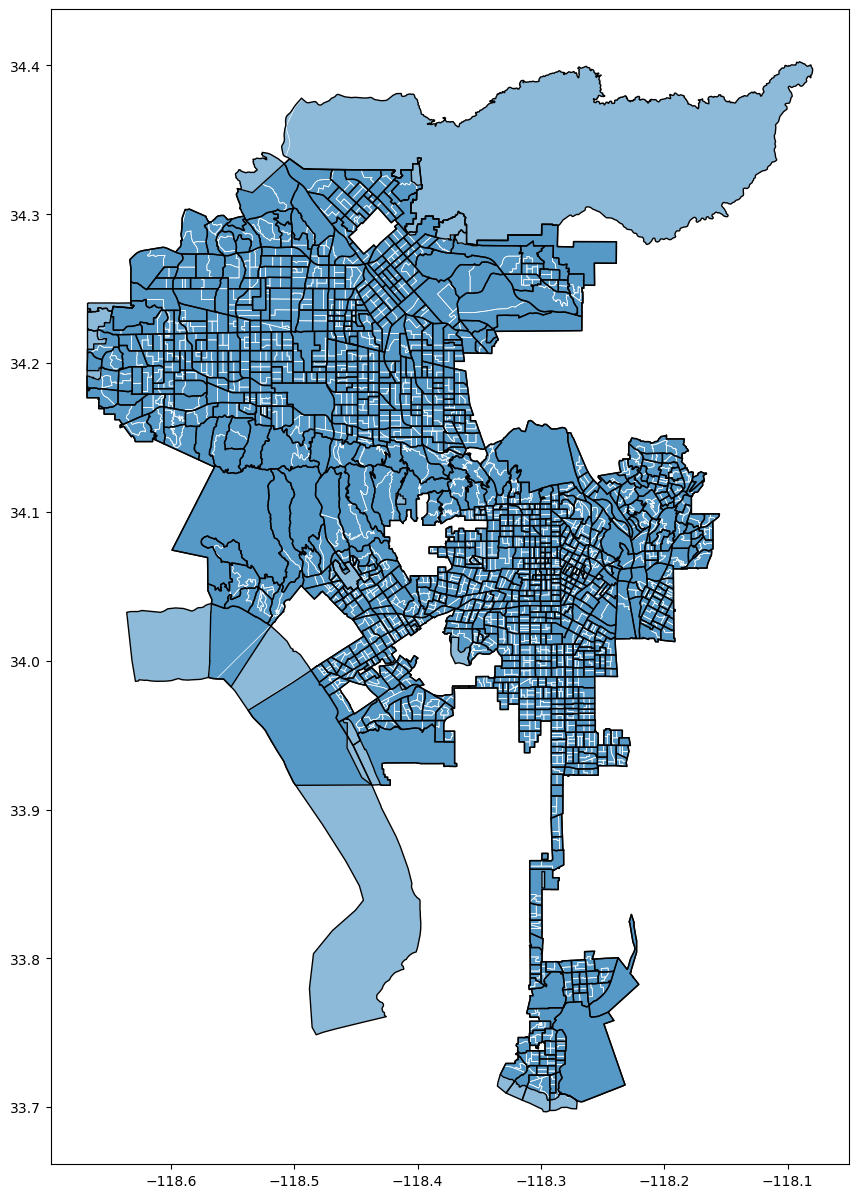

In [14]:
# compare
fig,ax = plt.subplots(figsize=(15,15))

# blue background of census tracts
gdf_tracts.plot(ax=ax,zorder=10,alpha=0.5)

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
gdf_bg.boundary.plot(ax=ax,color='white',zorder=15,lw=0.5)

# black boundary lines of census tracts on top of everything
gdf_tracts.boundary.plot(ax=ax,color='black',zorder=20,lw=1)

In [15]:
# trim the data to the bare minimum columns
gdf_bg = gdf_bg[['geoid','B01003001','geometry']]

# rename the columns
gdf_bg.columns = ['FIPS','TotalPop','geometry']

In [16]:
gdf_bg.drop(gdf_bg.tail(1).index,inplace=True)

In [17]:
# fix FIPS code
gdf_bg['FIPS'] = gdf_bg['FIPS'].str.replace('15000US','')

In [18]:
gdf_bg = gdf_bg.to_crs(epsg=3857)

In [19]:
arrests = gpd.GeoDataFrame(latlon_vend, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(latlon_vend.lon, latlon_vend.lat))

In [20]:
arrests = arrests.to_crs(epsg=3857)

In [21]:
arrests.query("name == 'Jefferson Park'")

Unnamed: 0  index_left        geoid  cr_geoid            name  \
3611        28481        91.0  06037222001     328.0  Jefferson Park   
3642        28531        86.0  06037219010     328.0  Jefferson Park   
3697        31813        90.0  06037221402     328.0  Jefferson Park   
3703        32257        90.0  06037221402     328.0  Jefferson Park   
3708        32338        88.0  06037219300     328.0  Jefferson Park   
...           ...         ...          ...       ...             ...   
19032      133389        86.0  06037219010     328.0  Jefferson Park   
19818      139380        85.0  06037218900     328.0  Jefferson Park   
20425      142409        85.0  06037218900     328.0  Jefferson Park   
20983      146031        90.0  06037221402     328.0  Jefferson Park   
20984      146032        90.0  06037221402     328.0  Jefferson Park   

          original_id  pop100  hu100  state_place_fips  OBJECTID  ...  \
3611   jefferson-park   160.0   53.0          644000.0     756.0  ...   
3642   jefferson-park    93.0   35.0          644000.0     730.0  ...   
3697   jefferson-park     0.0    0.0          644000.0     748.0  ...   
3703   jefferson-park     0.0    0.0          644000.0     748.0  ...   
3708   jefferson-park   176.0   71.0          644000.0     732.0  ...   
...               ...     ...    ...               ...       ...  ...   
19032  jefferson-park    93.0   35.0          644000.0     730.0  ...   
19818  jefferson-park   339.0  156.0          644000.0     729.0  ...   
20425  jefferson-park   339.0  156.0          644000.0     729.0  ...   
20983  jefferson-park     0.0    0.0          644000.0     748.0  ...   
20984  jefferson-park     0.0    0.0          644000.0     748.0  ...   

        ShapeSTArea  ShapeSTLength           chrg_desc      lat       lon  \
3611   5.105293e+06    9152.509540                 NaN  34.0256 -118.3089   
3642   4.745320e+06    9379.453748                 NaN  34.0256 -118.3224   
3697   5.729749e+06   12853.692266  DRINKING IN PUBLIC  34.0372 -118.3003   
3703   5.729749e+06   12853.692266  DRINKING IN PUBLIC  34.0373 -118.3090   
3708   7.016027e+06   11233.622302                 NaN  34.0256 -118.3305   
...             ...            ...                 ...      ...       ...   
19032  4.745320e+06    9379.453748                 NaN  34.0276 -118.3229   
19818  7.571354e+06   11505.719820                 NaN  34.0344 -118.3189   
20425  7.571354e+06   11505.719820    PARK REGULATIONS  34.0349 -118.3189   
20983  5.729749e+06   12853.692266                 NaN  34.0372 -118.3090   
20984  5.729749e+06   12853.692266                 NaN  34.0372 -118.3090   

            charge  year     rpt_id                           geometry  \
3611    41.27CLAMC  2013  130307412  POINT (-13170086.504 4032239.999)   
3642    41.27CLAMC  2013  130308517  POINT (-13171589.317 4032239.999)   
3697    41.27CLAMC  2010  100623218  POINT (-13169129.157 4033798.172)   
3703    41.27CLAMC  2010  100625964  POINT (-13170097.636 4033811.605)   
3708    41.27CLAMC  2013  130305204  POINT (-13172491.005 4032239.999)   
...            ...   ...        ...                                ...   
19032  63.44B14LAM  2019  190319772  POINT (-13171644.977 4032508.634)   
19818  63.44B24LAM  2019  190307010  POINT (-13171199.699 4033422.041)   
20425   63.44BLAMC  2010  100310843  POINT (-13171199.699 4033489.207)   
20983    80.73B2A3  2011  110611593  POINT (-13170097.636 4033798.172)   
20984   80.73B2A31  2011  110611594  POINT (-13170097.636 4033798.172)   

       neighborhood_type  
3611         Gentrifying  
3642         Gentrifying  
3697         Gentrifying  
3703         Gentrifying  
3708         Gentrifying  
...                  ...  
19032        Gentrifying  
19818        Gentrifying  
20425        Gentrifying  
20983        Gentrifying  
20984        Gentrifying  

[1119 rows x 22 columns]

In [22]:
arrests.lon = arrests.lon.astype('float')
arrests.lat = arrests.lat.astype('float')

In [23]:
arrests = arrests.drop(['index_left'], axis=1)

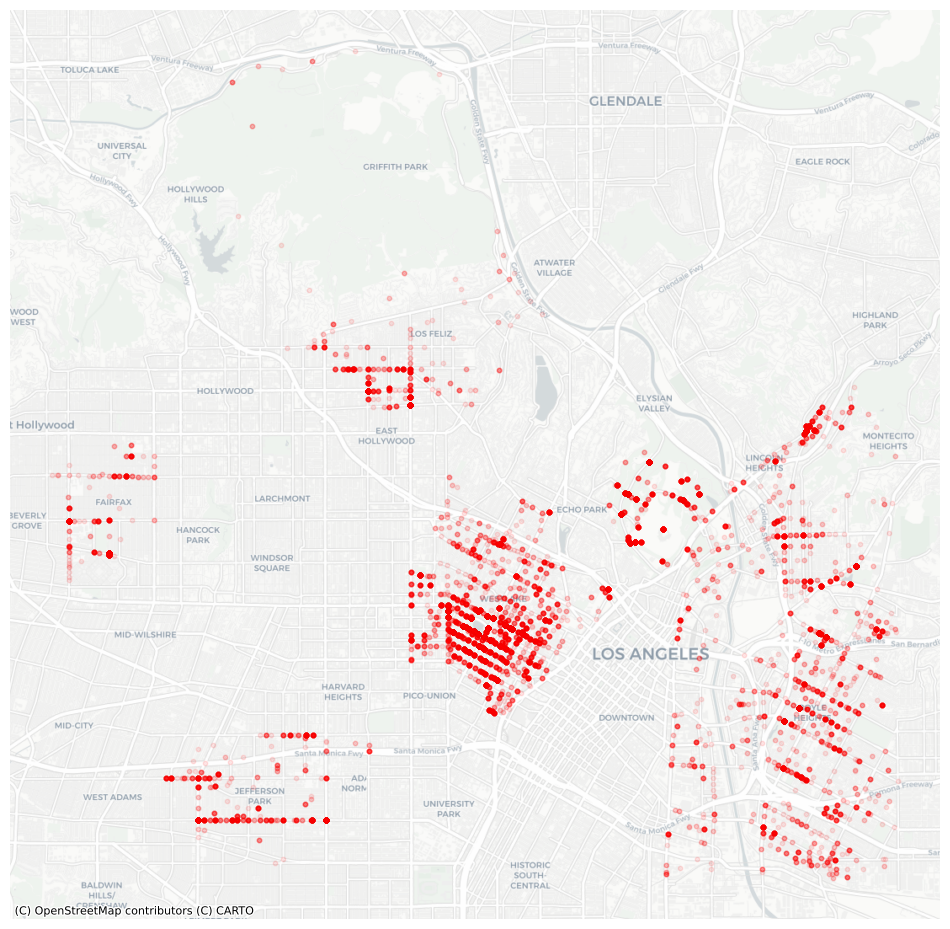

In [24]:
fig,ax = plt.subplots(figsize=(12,12))

arrests.plot(ax=ax,
             color='red',
             markersize=10, alpha=0.1)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [25]:
# get the bounding box coordinates for the arrest data
minx, miny, maxx, maxy = arrests.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13176309.26384767
-13157117.783634907
4030923.7774658045
4049687.5851563863


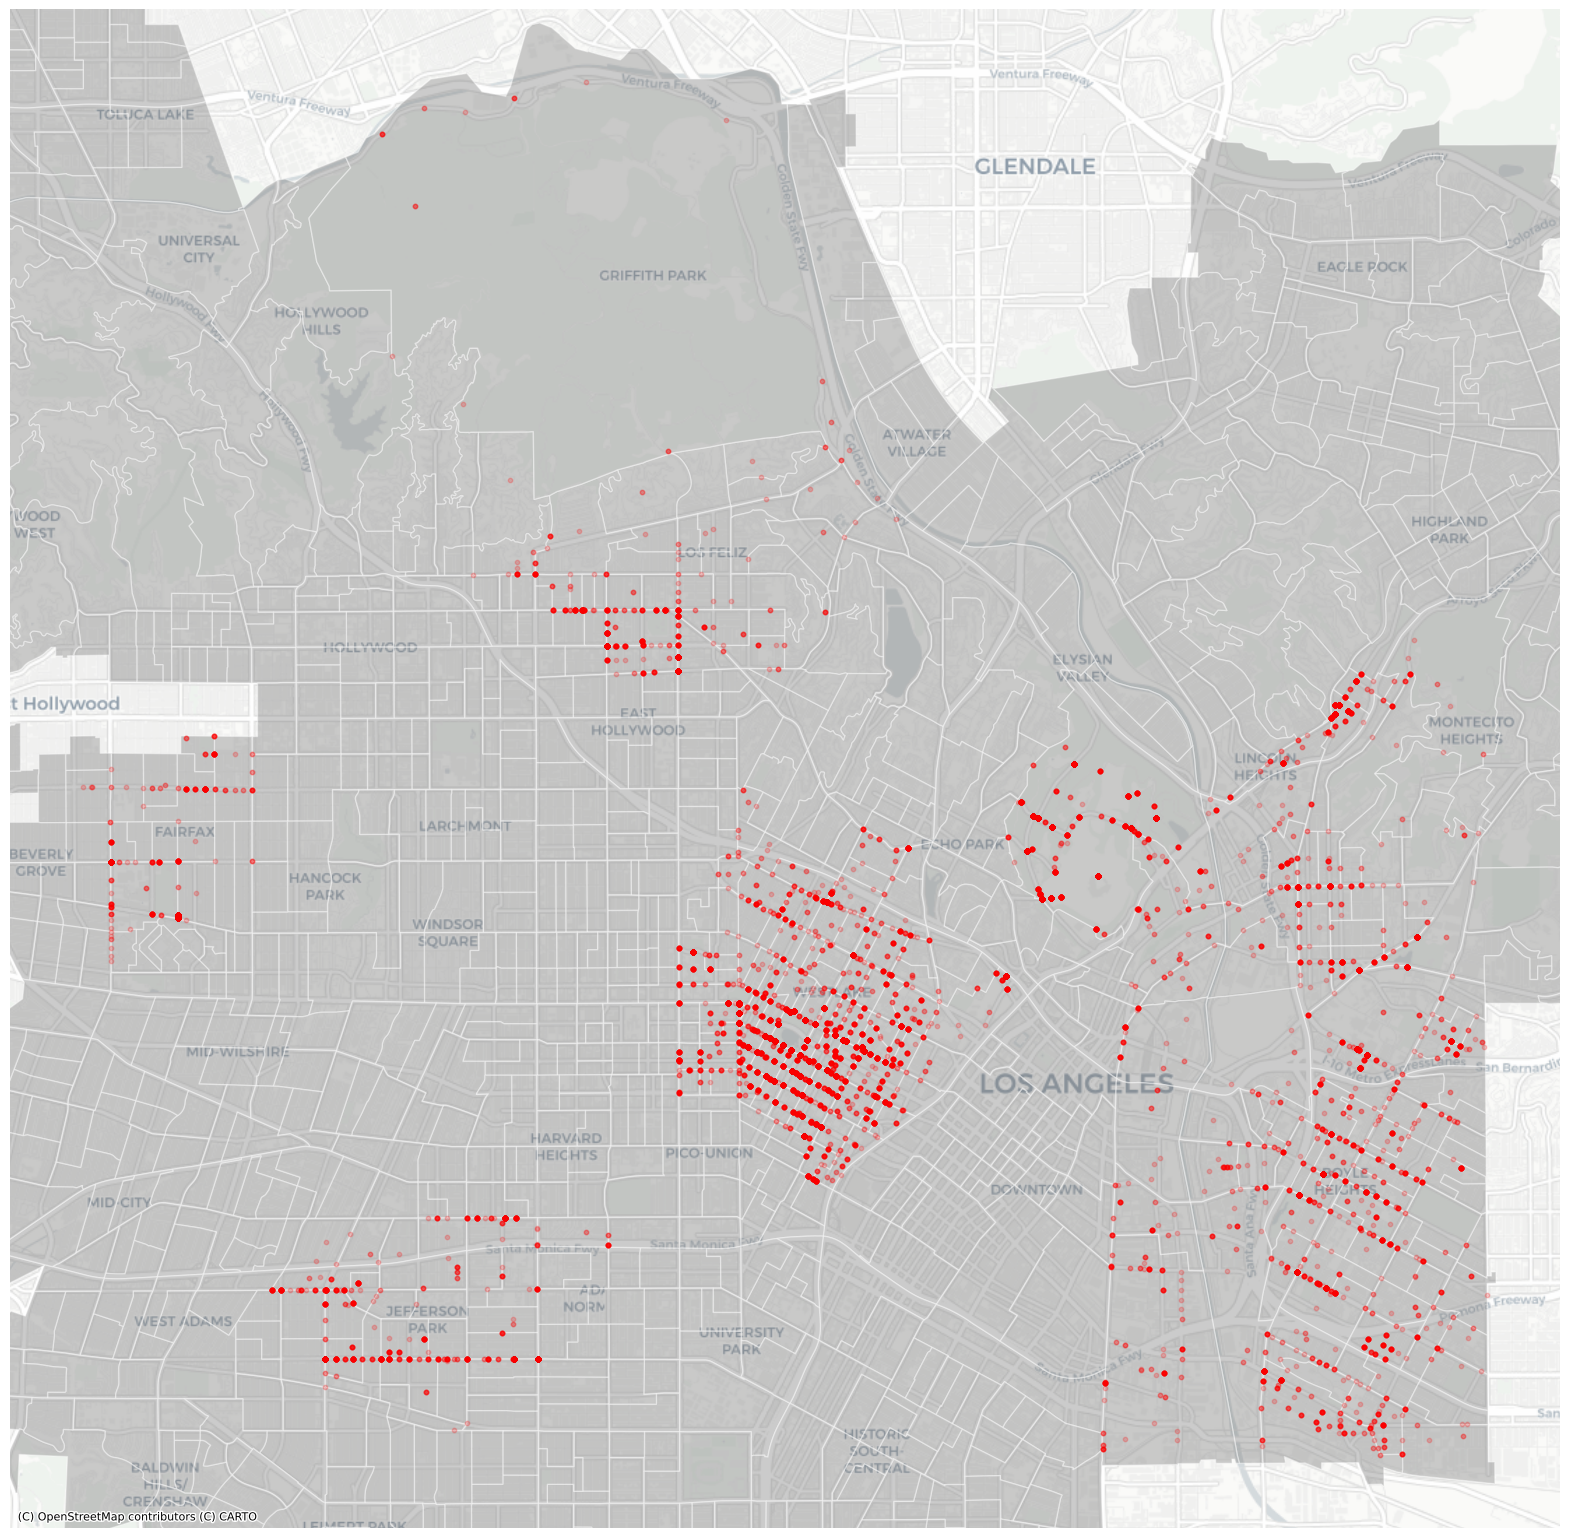

In [26]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(20, 20))

# block groups
gdf_bg.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.4)

# arrests
arrests.plot(ax=ax, # this also puts it in the same ax plot
        color='red',
        markersize=10,
        alpha=0.2)

# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [27]:
arrests.shape

(17605, 21)

In [28]:
join = gpd.sjoin(gdf_bg, arrests, how='left')

In [29]:
arrests_by_bg = join.FIPS.value_counts().rename_axis('FIPS').reset_index(name='arrests_count')
arrests_by_bg

FIPS  arrests_count
0     060372088011           3398
1     060379800101           1531
2     060372094022            715
3     060372088022            573
4     060371912012            416
...            ...            ...
2679  060371395022              1
2680  060371395041              1
2681  060371395042              1
2682  060371395051              1
2683  060379902000              1

[2684 rows x 2 columns]

In [30]:
gdf_count=gdf_bg.merge(arrests_by_bg,on='FIPS')

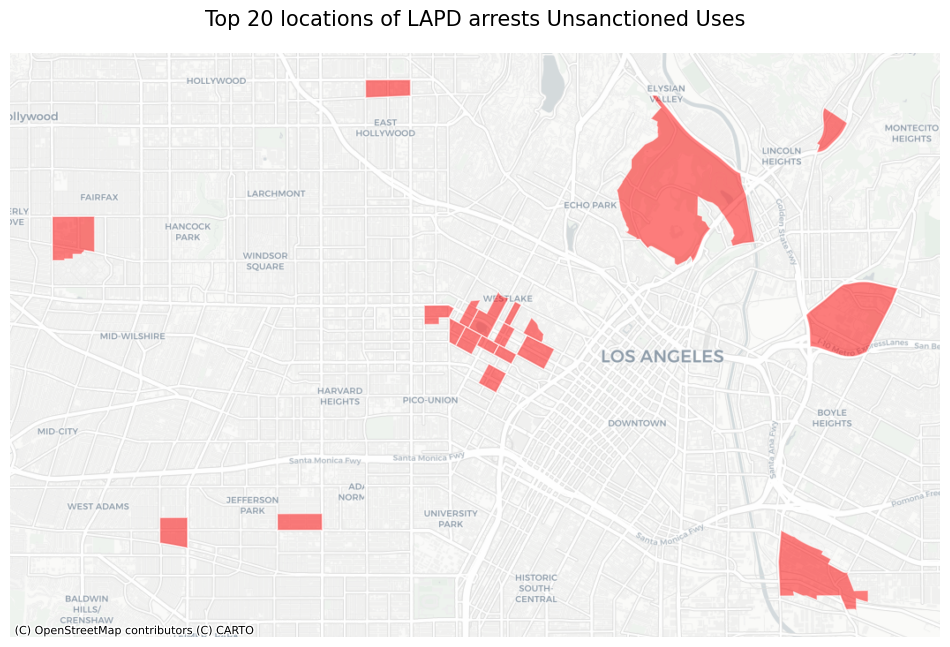

In [31]:
# map the top 20 geographies
fig,ax = plt.subplots(figsize=(12,10))
gdf_count.sort_values(by='arrests_count',ascending=False)[:20].plot(ax=ax,
                                                                 color='red',
                                                                 edgecolor='white',
                                                                 alpha=0.5)


# title
ax.set_title('Top 20 locations of LAPD arrests Unsanctioned Uses',fontsize=15,pad=20)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [32]:
gdf_filtered = gdf_count.query('arrests_count > 170')

In [33]:
gdf_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 1149 to 2669
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FIPS           20 non-null     object  
 1   TotalPop       20 non-null     float64 
 2   geometry       20 non-null     geometry
 3   arrests_count  20 non-null     int64   
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 800.0+ bytes


In [34]:
import folium

In [35]:
dt = [34.049425, -118.246379]

m = folium.Map(location=dt, 
               zoom_start=12,
              tiles='CartoDB Positron')

threshold_scale = [150, 350, 550, 2000, 4000]  # boundaries between color classes

folium.Choropleth(
    geo_data=gdf_filtered,
    data=gdf_filtered,
    key_on='feature.properties.FIPS',
    columns=['FIPS','arrests_count'],
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Street Vending Arrests',
    smooth_factor=0,
    threshold_scale=threshold_scale,
    
).add_to(m)

m

In [36]:
icone1 = folium.Icon(icon="tree", icon_color="white", color="darkgreen", prefix="fa",)
marker1 = folium.Marker([34.073744, -118.355059], popup='Pan Pacific Park', icon=icone1)
marker1.add_to(m)

icone2 = folium.Icon(icon="tree", icon_color="white", color="lightgray", prefix="fa")
marker2 = folium.Marker([34.100167, -118.294113], popup='Barnsdall Art Park', icon=icone2)
marker2.add_to(m)

icone3 = folium.Icon(icon="tree", icon_color="white", color="lightgray", prefix="fa",)
marker3 = folium.Marker([34.062594, -118.284102], popup='Lafayette Park', icon=icone3)
marker3.add_to(m)

icone4 = folium.Icon(icon="tree", icon_color="white", color="darkgreen", prefix="fa",)
marker4 = folium.Marker([34.058964, -118.278089], popup='MacArthur Park', icon=icone4)
marker4.add_to(m)

icone6 = folium.Icon(icon="tree", icon_color="white", color="darkgreen", prefix="fa",)
marker6 = folium.Marker([34.077254, -118.239923], popup='Elysian Park, Dodgers Stadium', icon=icone6)
marker6.add_to(m)

icone7 = folium.Icon(icon="tree", icon_color="white", color="lightgray", prefix="fa",)
marker7 = folium.Marker([34.090542, -118.212280], popup='Greayers Oak Mini Park', icon=icone7)
marker7.add_to(m)

icone8 = folium.Icon(icon="tree", icon_color="white", color="lightgray", prefix="fa",)
marker8 = folium.Marker([34.092803, -118.207016], popup='Lummis Park', icon=icone8)
marker8.add_to(m)

icone9 = folium.Icon(icon="tree", icon_color="white", color="lightgray", prefix="fa",)
marker9 = folium.Marker([34.066862, -118.200778], popup='Lincoln Park', icon=icone9)
marker9.add_to(m)

icone10 = folium.Icon(icon="tree", icon_color="white", color="darkgreen", prefix="fa",)
marker10 = folium.Marker([34.059237, -118.201524], popup='Hazard Recreation Center', icon=icone10)
marker10.add_to(m)

icone13 = folium.Icon(icon="tree", icon_color="white", color="darkgreen", prefix="fa",)
marker13 = folium.Marker([34.021077, -118.211124], popup='Lou Costello Jr Recreation Center', icon=icone13)
marker13.add_to(m)

In [37]:
m

In [38]:
m.save('vendmap.html')

In [39]:
transit = pd.read_csv('Metro_Stations.csv')

In [40]:
for index, row in transit.iterrows():
    print(row.Name, row.latitude, row.longitude)

Union Station 34.05605499 -118.23644042
Long Beach Transit Mall 33.768069 -118.192689
1st Street Metro Station 33.768078 -118.189832
Pacific Metro Station 33.772137 -118.193715
5th Street Metro Station 33.772348 -118.189364
Anaheim Metro Station 33.782302 -118.189359
PCH Metro Station 33.789566 -118.189361
Willow Metro Station 33.806285 -118.189487
Wardlow Metro Station 33.819397 -118.195716
Del Amo Metro Station 33.847566 -118.210822
Artesia Metro Station 33.876644 -118.222793
Compton Metro Station 33.896314 -118.224232
Imperial / Wilmington (Rosa Parks) Metro Station 33.929046 -118.23805
103rd Street Metro Station 33.942702 -118.24324
Firestone Metro Station 33.959616 -118.243261
Florence Metro Station 33.974346 -118.24331
Slauson Metro Station 33.987604 -118.243195
Vernon Metro Station 34.003194 -118.243138
Washington Metro Station 34.020406 -118.242825
San Pedro Metro Station 34.027081 -118.256067
Grand Metro Station 34.033017 -118.268996
Pico Metro Station 34.040422 -118.266455
7t

In [152]:
t = folium.Map(location=dt, 
               zoom_start=12,
              tiles='CartoDB Positron')

threshold_scale = [150, 350, 550, 2000, 4000]  # boundaries between color classes

folium.Choropleth(
    geo_data=gdf_filtered,
    data=gdf_filtered,
    key_on='feature.properties.FIPS',
    columns=['FIPS','arrests_count'],
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Street Vending Arrests',
    smooth_factor=0,
    threshold_scale=threshold_scale,
    
).add_to(t)

In [150]:
f = folium.Map(location=dt, 
               zoom_start=12,
              tiles='CartoDB Positron')

threshold_scale = [150, 350, 550, 2000, 4000]  # boundaries between color classes

folium.Choropleth(
    geo_data=gdf_filtered,
    data=gdf_filtered,
    key_on='feature.properties.FIPS',
    columns=['FIPS','arrests_count'],
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Street Vending Arrests',
    smooth_factor=0,
    threshold_scale=threshold_scale,
    
).add_to(f)

In [151]:
for index, row in transit.iterrows():
    # add folium marker code
    folium.Circle([row.latitude, row.longitude], 
                  popup=row.Name, 
                  tooltip=row.description,
                 color = 'gray').add_to(f)
f

In [46]:
# read and add shapefile to notebook
metro = gpd.read_file('Stations_All_0316.zip')

In [47]:
mf = metro[['LINE','LINENUM','STATION','LAT','LONG','geometry']]

In [139]:
purple = mf.loc[mf['LINE'] == 'Purple']

In [140]:
for index, row in purple.iterrows():
    print("(", row.LAT,",", row.LONG,")",",")

( 34.061753 , -118.301458 ) ,
( 34.061689 , -118.308756 ) ,


In [141]:
purplepoints = [ ( 34.061753 , -118.301458 ) ,
( 34.061689 , -118.308756 ) ,
( 34.062701 , -118.290082 ) ,
( 34.056368 , -118.274879 ) ,
( 34.048634 , -118.258682 ) ,
( 34.049316 , -118.251259 ) ,
( 34.0549 , -118.246057 ) ,
( 34.056197 , -118.234249 )]

In [127]:
green = mf.loc[mf['LINE'] == 'Green']

In [122]:
for index, row in green.iterrows():
    print("(", row.LAT,",", row.LONG,")",",")

( 33.89464 , -118.369196 ) ,
( 33.905299 , -118.383113 ) ,
( 33.916063 , -118.386539 ) ,
( 33.9232 , -118.387572 ) ,
( 33.929621 , -118.377134 ) ,
( 33.933408 , -118.351602 ) ,
( 33.925201 , -118.32655 ) ,
( 33.928683 , -118.291733 ) ,
( 33.928714 , -118.2811 ) ,
( 33.927465 , -118.265217 ) ,
( 33.928258 , -118.238052 ) ,
( 33.92488 , -118.209945 ) ,
( 33.91307 , -118.1406 ) ,
( 33.914033 , -118.104717 ) ,


In [123]:
greenpoints=[( 33.89464 , -118.369196 ) ,
( 33.905299 , -118.383113 ) ,
( 33.916063 , -118.386539 ) ,
( 33.9232 , -118.387572 ) ,
( 33.929621 , -118.377134 ) ,
( 33.933408 , -118.351602 ) ,
( 33.925201 , -118.32655 ) ,
( 33.928683 , -118.291733 ) ,
( 33.928714 , -118.2811 ) ,
( 33.927465 , -118.265217 ) ,
( 33.928258 , -118.238052 ) ,
( 33.92488 , -118.209945 ) ,
( 33.91307 , -118.1406 ) ,
( 33.914033 , -118.104717 )]

In [117]:
gold = mf.loc[mf['LINE'] == 'Gold']

In [110]:
for index, row in gold.iterrows():
    print("(", row.LAT,",", row.LONG,")",",")

( 34.033398 , -118.154469 ) ,
( 34.033364 , -118.161206 ) ,
( 34.033319 , -118.16814 ) ,
( 34.0343 , -118.192182 ) ,
( 34.043747 , -118.210061 ) ,
( 34.047215 , -118.219648 ) ,
( 34.047634 , -118.22594 ) ,
( 34.0501 , -118.237901 ) ,
( 34.056061 , -118.234759 ) ,
( 34.063861 , -118.23584 ) ,
( 34.080949 , -118.220429 ) ,
( 34.087227 , -118.213213 ) ,
( 34.098243 , -118.206712 ) ,
( 34.111179 , -118.192606 ) ,
( 34.115186 , -118.157886 ) ,
( 34.133521 , -118.148126 ) ,
( 34.14191 , -118.148214 ) ,
( 34.148356 , -118.147512 ) ,
( 34.151806 , -118.13139 ) ,
( 34.152417 , -118.114348 ) ,
( 34.147752 , -118.081212 ) ,
( 34.14286 , -118.029199 ) ,
( 34.133155 , -118.003473 ) ,
( 34.132518 , -117.96768 ) ,
( 34.129048 , -117.932506 ) ,
( 34.135863 , -117.906631 ) ,
( 34.136814 , -117.891636 ) ,


In [111]:
goldpoint = [
( 34.033398 , -118.154469 ) ,
( 34.033364 , -118.161206 ) ,
( 34.033319 , -118.16814 ) ,
( 34.0343 , -118.192182 ) ,
( 34.043747 , -118.210061 ) ,
( 34.047215 , -118.219648 ) ,
( 34.047634 , -118.22594 ) ,
( 34.0501 , -118.237901 ) ,
( 34.056061 , -118.234759 ) ,
( 34.063861 , -118.23584 ) ,
( 34.080949 , -118.220429 ) ,
( 34.087227 , -118.213213 ) ,
( 34.098243 , -118.206712 ) ,
( 34.111179 , -118.192606 ) ,
( 34.115186 , -118.157886 ) ,
( 34.133521 , -118.148126 ) ,
( 34.14191 , -118.148214 ) ,
( 34.148356 , -118.147512 ) ,
( 34.151806 , -118.13139 ) ,
( 34.152417 , -118.114348 ) ,
( 34.147752 , -118.081212 ) ,
( 34.14286 , -118.029199 ) ,
( 34.133155 , -118.003473 ) ,
( 34.132518 , -117.96768 ) ,
( 34.129048 , -117.932506 ) ,
( 34.135863 , -117.906631 ) ,
( 34.136814 , -117.891636 ) ]

In [100]:
expo = mf.loc[mf['LINE'] == 'EXPO']

In [101]:
for index, row in expo.iterrows():
    print("(", row.LAT,",", row.LONG,")",",")

( 34.029112 , -118.273603 ) ,
( 34.022123 , -118.278118 ) ,
( 34.018227 , -118.285734 ) ,
( 34.018245 , -118.29154 ) ,
( 34.018331 , -118.30891 ) ,
( 34.022526 , -118.335078 ) ,
( 34.023981 , -118.346095 ) ,
( 34.024803 , -118.355159 ) ,
( 34.026355 , -118.37212 ) ,
( 34.027896 , -118.388986 ) ,
( 34.029323 , -118.404255 ) ,
( 34.036816 , -118.424576 ) ,
( 34.035408 , -118.434234 ) ,
( 34.031705 , -118.452896 ) ,
( 34.027995 , -118.46912 ) ,
( 34.023155 , -118.480372 ) ,
( 34.01401 , -118.491384 ) ,


In [105]:
expopoints =[( 34.040735 , -118.266118 ) ,
( 34.04861 , -118.258822 ),
( 34.029112 , -118.273603 ) ,
( 34.022123 , -118.278118 ) ,
( 34.018227 , -118.285734 ) ,
( 34.018245 , -118.29154 ) ,
( 34.018331 , -118.30891 ) ,
( 34.022526 , -118.335078 ) ,
( 34.023981 , -118.346095 ) ,
( 34.024803 , -118.355159 ) ,
( 34.026355 , -118.37212 ) ,
( 34.027896 , -118.388986 ) ,
( 34.029323 , -118.404255 ) ,
( 34.036816 , -118.424576 ) ,
( 34.035408 , -118.434234 ) ,
( 34.031705 , -118.452896 ) ,
( 34.027995 , -118.46912 ) ,
( 34.023155 , -118.480372 ) ,
( 34.01401 , -118.491384 )]

In [69]:
red = mf.loc[mf['LINE'] == 'Red']

In [70]:
redpurp = mf.loc[mf['LINE'] == 'Red/Purple']

In [62]:
for index, row in red.iterrows():
    print("(", row.LAT,",", row.LONG,")",",")

( 34.168504 , -118.376808 ) ,
( 34.140002 , -118.362699 ) ,
( 34.101547 , -118.338549 ) ,
( 34.10163 , -118.32518 ) ,
( 34.101737 , -118.308117 ) ,
( 34.097708 , -118.291756 ) ,
( 34.08991 , -118.29173 ) ,
( 34.076526 , -118.291686 ) ,


In [71]:
for index, row in redpurp.iterrows():
    print("(", row.LAT,",", row.LONG,")",",")

( 34.062701 , -118.290082 ) ,
( 34.056368 , -118.274879 ) ,
( 34.048634 , -118.258682 ) ,
( 34.049316 , -118.251259 ) ,
( 34.0549 , -118.246057 ) ,
( 34.056197 , -118.234249 ) ,


In [72]:
red_points = [
( 34.168504 , -118.376808 ) ,
( 34.140002 , -118.362699 ) ,
( 34.101547 , -118.338549 ) ,
( 34.10163 , -118.32518 ) ,
( 34.101737 , -118.308117 ) ,
( 34.097708 , -118.291756 ) ,
( 34.08991 , -118.29173 ) ,
( 34.076526 , -118.291686 ),
( 34.062701 , -118.290082 ) ,
( 34.056368 , -118.274879 ) ,
( 34.048634 , -118.258682 ) ,
( 34.049316 , -118.251259 ) ,
( 34.0549 , -118.246057 ) ,
( 34.056197 , -118.234249 )]

In [84]:
blue = mf.loc[mf['LINE'] == 'Blue']

In [91]:
expoblue = mf.loc[mf['LINE'] == 'Blue/EXPO']

In [85]:
for index, row in blue.iterrows():
    print("(", row.LAT,",", row.LONG,")",",")

( 33.768071 , -118.192921 ) ,
( 33.772258 , -118.1937 ) ,
( 33.78183 , -118.189384 ) ,
( 33.78909 , -118.189382 ) ,
( 33.807079 , -118.189834 ) ,
( 33.819865 , -118.19609 ) ,
( 33.848222 , -118.211017 ) ,
( 33.876082 , -118.222503 ) ,
( 33.89749 , -118.224249 ) ,
( 33.928048 , -118.237555 ) ,
( 33.94222 , -118.243159 ) ,
( 33.959611 , -118.243205 ) ,
( 33.97374 , -118.243271 ) ,
( 33.98876 , -118.243398 ) ,
( 34.00292 , -118.243303 ) ,
( 34.01965 , -118.243084 ) ,
( 34.026807 , -118.255505 ) ,
( 34.033155 , -118.269333 ) ,
( 33.76874 , -118.189362 ) ,
( 33.773598 , -118.189412 ) ,


In [92]:
for index, row in expoblue.iterrows():
    print("(", row.LAT,",", row.LONG,")",",")

( 34.040735 , -118.266118 ) ,
( 34.04861 , -118.258822 ) ,


In [97]:
blue_points = [( 33.76874 , -118.189362 ) ,
( 33.773598 , -118.189412 ),
( 33.768071 , -118.192921 ) ,
( 33.772258 , -118.1937 ) ,
( 33.78183 , -118.189384 ) ,
( 33.78909 , -118.189382 ) ,
( 33.807079 , -118.189834 ) ,
( 33.819865 , -118.19609 ) ,
( 33.848222 , -118.211017 ) ,
( 33.876082 , -118.222503 ) ,
( 33.89749 , -118.224249 ) ,
( 33.928048 , -118.237555 ) ,
( 33.94222 , -118.243159 ) ,
( 33.959611 , -118.243205 ) ,
( 33.97374 , -118.243271 ) ,
( 33.98876 , -118.243398 ) ,
( 34.00292 , -118.243303 ) ,
( 34.01965 , -118.243084 ) ,
( 34.026807 , -118.255505 ) ,
( 34.04861 , -118.258822 )
( 34.033155 , -118.269333 ) ,
( 34.040735 , -118.266118 )]

In [155]:
folium.PolyLine(red_points,
               color="red",
               weight =4,
               opacity=.5).add_to(t)

folium.PolyLine(blue_points,
               color="blue",
               weight =4,
               opacity=.5).add_to(t)

folium.PolyLine(expopoints,
               weight =4,
               opacity=.5).add_to(t)

folium.PolyLine(goldpoint,
                color="gold",
               weight =4,
               opacity=.75).add_to(t)

folium.PolyLine(greenpoints,
                color="green",
               weight =4,
               opacity=.75).add_to(t)

folium.PolyLine(purplepoints,
                color="purple",
               weight =4,
               opacity=.75).add_to(t)

In [156]:
icone14 = folium.Icon(icon="train", icon_color="white", color="red", prefix="fa",)
marker14 = folium.Marker([34.098202, -118.291759], popup='Vermont / Sunset Metro Station', icon=icone14)
marker14.add_to(t)

icone15 = folium.Icon(icon="train", icon_color="white", color="blue", prefix="fa",)
marker15 = folium.Marker([34.02252995, -118.33483848], popup='Expo/Crenshaw Metro Station', icon=icone15)
marker15.add_to(t)

icone16 = folium.Icon(icon="train", icon_color="white", color="red", prefix="fa",)
marker16 = folium.Marker([ 34.05723, -118.276328], popup='Westlake / McArthur Park Metro Station', icon=icone16)
marker16.add_to(t)

icone17 = folium.Icon(icon="train", icon_color="white", color="red", prefix="fa",)
marker17 = folium.Marker([34.06229, -118.291005], popup='Wilshire / Vermont Metro Station', icon=icone17)
marker17.add_to(t)

icone18 = folium.Icon(icon="train", icon_color="white", color="orange", prefix="fa",)
marker18 = folium.Marker([34.087747, -118.212631], popup='Heritage Square', icon=icone18)
marker18.add_to(t)

icone19 = folium.Icon(icon="train", icon_color="white", color="orange", prefix="fa",)
marker19 = folium.Marker([34.064799, -118.235618], popup='Chinatown Metro Station', icon=icone19)
marker19.add_to(t)

t

In [160]:
t.save('tmap.html')